This notebook is for Funnel Analysis in 'Data Science Take Home Challenge'

## load data and library

In [64]:
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
home = pd.read_csv("home_page_table.csv")
confirmation = pd.read_csv("payment_confirmation_table.csv")
payment = pd.read_csv("payment_page_table.csv")
search =  pd.read_csv("search_page_table.csv")
user = pd.read_csv("user_table.csv")

In [21]:
home = home.rename(columns={'page': 'home'})
confirmation = confirmation.rename(columns={'page': 'confirmation'})
payment = payment.rename(columns={'page': 'payment'})
search = search.rename(columns={'page': 'search'})

In [22]:
user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [23]:
confirmation.head()

,user_id,confirmation
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [42]:
dfs = [home,confirmation,payment,search,user]
df1 = user.merge(home, on='user_id',how = 'left')
df2 = df1.merge(confirmation,on='user_id',how = 'left')
df3 = df2.merge(payment,on='user_id',how = 'left')
df = df3.merge(search,on='user_id',how = 'left')

In [43]:
df.head()

,user_id,date,device,sex,home,confirmation,payment,search
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,NaN,NaN,search_page
3,190794,2015-02-18,Desktop,Female,home_page,NaN,NaN,search_page
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [44]:
df.info()
#we see there are just a few users go to confirmation page

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
user_id         90400 non-null int64
date            90400 non-null object
device          90400 non-null object
sex             90400 non-null object
home            90400 non-null object
confirmation    452 non-null object
payment         6030 non-null object
search          45200 non-null object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


## Exploratory Analysis

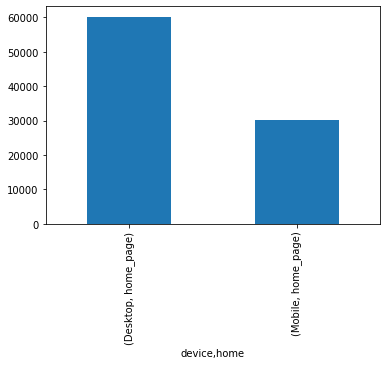

In [45]:
df.groupby('device')['home'].value_counts().plot(kind='bar')

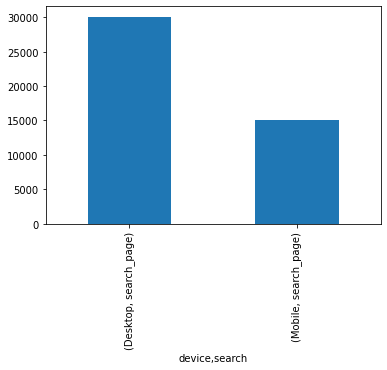

In [46]:
df.groupby('device')['search'].value_counts().plot(kind='bar')

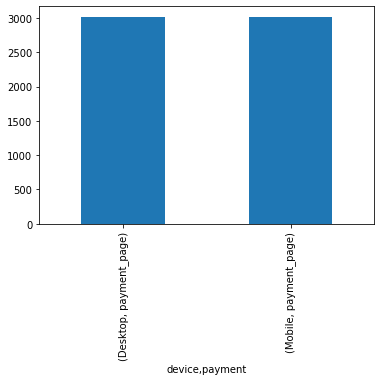

In [47]:
df.groupby('device')['payment'].value_counts().plot(kind='bar')

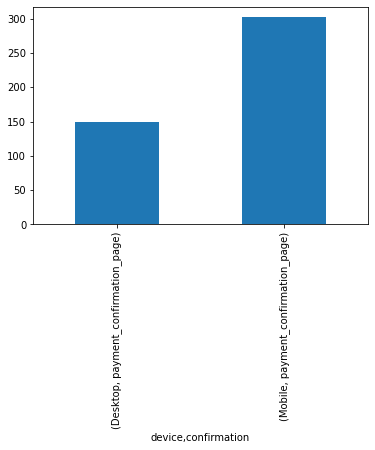

In [48]:
df.groupby('device')['confirmation'].value_counts().plot(kind='bar')

> There are more users use desktop to search and visit but more of them use mobile for payment confirmation, there is no clear difference in payment

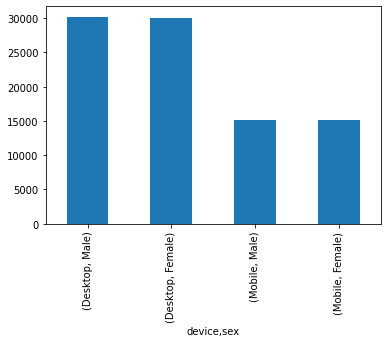

In [49]:
df.groupby('device')['sex'].value_counts().plot(kind='bar')

In [75]:
#calculate conversion rate for each page
def conversion(df):
    rates = []
    r = df[~df['home'].isnull()]
    rates.append(1-r['search'].isnull().sum()/len(r))
    
    r1 = df[~df['search'].isnull()]
    rates.append(1-r1['payment'].isnull().sum()/len(r1))
    
    r2 = df[~df['payment'].isnull()]
    rates.append(1-r2['confirmation'].isnull().sum()/len(r2))
    return rates
    
    


In [76]:
desk_rates = conversion(df[df['device']=='Desktop'])
mobile_rates = conversion(df[df['device']=='Mobile'])

In [77]:
desk_rates
#mobile_rates

[0.5, 0.09999999999999998, 0.04983388704318936]

In [79]:
maps = {'Page':['home', 'search', 'payment', 'home', 'search', 'payment'],
       'Device': ['Desktop', 'Desktop', 'Desktop', 'Mobile', 'Mobile', 'Mobile'], 
        'Conversion Rate': desk_rates + mobile_rates}
device_cov = pd.DataFrame(maps, columns=['Page','Device','Conversion Rate'])
device_cov

,Page,Device,Conversion Rate
0,home,Desktop,0.500000
1,search,Desktop,0.100000
2,payment,Desktop,0.049834
3,home,Mobile,0.500000
4,search,Mobile,0.200000
5,payment,Mobile,0.100000


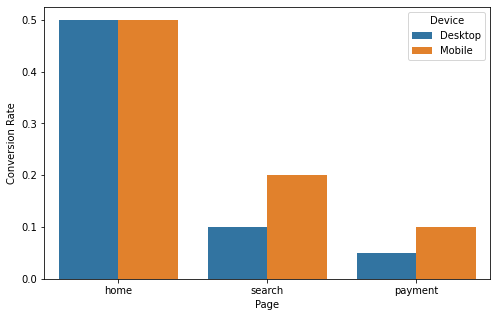

In [80]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=device_cov, ax=ax, hue='Device')
plt.show()

In [81]:
female_rates = conversion(df[df['sex']=='Female'])
male_rates = conversion(df[df['sex']=='Male'])

In [82]:
maps = {'Page':['home', 'search', 'payment', 'home', 'search', 'payment'],
       'Sex': ['Female', 'Female', 'Female', 'Male', 'Male', 'Male'], 
        'Conversion Rate': female_rates + male_rates}
sex_cov = pd.DataFrame(maps, columns=['Page','Sex','Conversion Rate'])
sex_cov

,Page,Sex,Conversion Rate
0,home,Female,0.503073
1,search,Female,0.136708
2,payment,Female,0.077742
3,home,Male,0.496944
4,search,Male,0.130083
5,payment,Male,0.072014


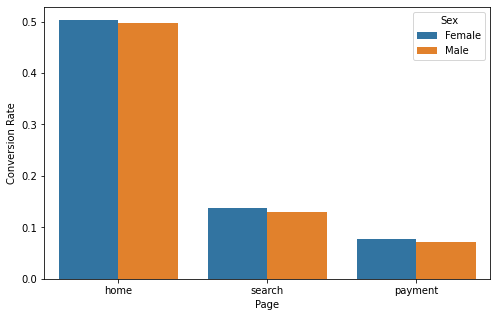

In [85]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=sex_cov, ax=ax, hue='Sex')
plt.show()

Not much difference